In [1]:
%cd ../

/home/ruslan/Documents/course-project-TiMP


In [2]:
import pickle
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from sortedcontainers import SortedDict
import numpy as np
import seaborn as sns; sns.set()
from  matplotlib import cm

# Часть 1. code2vec
## Создаём гистограмму для колчества функций встречающихся в датасете в зависимости от их частоты.
Огромная функция для построения графика зависимости количества элементов с данной частотой вхождений от этой частоты.

Происходит парсинг вокабов, полученных при препроцессинге, создание гистограммы, а также вычисление размеров отфильтрованных данных для последующего вывода на график.


In [3]:
def historgram(train_vocab, train_name, test_vocab, test_name, val_vocab, val_name, limit, plot_xlim = 100):
    plt.figure(figsize=(20, 10))
    train_vocab = {key:int(value) for key, value in train_vocab.items()}
    train = SortedDict(sorted(Counter(train_vocab.values()).items()))
    test_vocab = {key:int(value) for key, value in test_vocab.items()}
    test = SortedDict(sorted(Counter(test_vocab.values()).items()))
    val_vocab = {key:int(value) for key, value in val_vocab.items()}
    val = SortedDict(sorted(Counter(val_vocab.values()).items()))
    combined_keys = {*train.keys(), *test.keys(), *val.keys()}
    train_missing_keys = combined_keys - train.keys()
    train.update({key:0 for key in train_missing_keys})
    test_missing_keys = combined_keys - test.keys()
    test.update({key:0 for key in test_missing_keys})
    val_missing_keys = combined_keys - val.keys()
    val.update({key:0 for key in val_missing_keys})
    
    bad = {key:train[key]+test[key]+val[key] for key in train.keys() if key < limit}
    plt.bar(list(train.keys()), list(train.values()), label=train_name)
    plt.bar(list(test.keys()), list(test.values()), bottom=list(train.values()), color='green', label=test_name)
    plt.bar(list(val.keys()), list(val.values()), bottom=np.sum((list(train.values()), list(test.values())), axis=0), color='red', label=val_name)
    plt.bar(list(bad.keys()), list(bad.values()), color="black", label="filtered", alpha=0.4)
    plt.yscale("log")
    plt.legend()
    plt.xlim(0, plot_xlim)
    plt.xlabel("Частота вхождения элемента в AST.")
    plt.ylabel("Количество элементов с такой частотой.")
    bad_quantity = [0,0,0]
    total_quantity = [0, 0, 0]
    for i in range(1, limit):
        bad_quantity[0]+=i*train[i]
        bad_quantity[1]+=i*test[i]
        bad_quantity[2]+=i*val[i]
    for key in train.keys():
        total_quantity[0]+=key*train[key]
        total_quantity[1]+=key*test[key]
        total_quantity[2]+=key*val[key]
    if limit>1:
        plt.title("График для ограничения "+ str(limit))
        plt.suptitle("Для тренировочного датасета: отфильтровано " + str(bad_quantity[0]) + " из " + str(total_quantity[0]) + 
                     ", т. е. "  + "%.2f" % (100 * bad_quantity[0]/total_quantity[0]) + "%.\n"
                     "Для тестового датасета: отфильтровано " + str(bad_quantity[1]) + " из " + str(total_quantity[1]) + 
                     ", т. е. "  + "%.2f" % (100 * bad_quantity[1]/total_quantity[1]) + "%.\n"
                     "Для валидационного датасета: отфильтровано " + str(bad_quantity[2]) + " из " + str(total_quantity[2]) + 
                     ", т. е. "  + "%.2f" % (100 * bad_quantity[2]/total_quantity[2]) + "%.\n"
                    )
    plt.savefig("img.png", dpi=300)

    

Поднимаем данные при помощи pickle, причём первые два словаря в c2v.dict это train_token и train_path, они нам не нужны. После этого загружаем всё в гистограмму.

In [4]:
def dict_info(path, plot_xlim = 100):
    with open(path, "rb") as file:
        _ = pickle.load(file)
        _ = pickle.load(file)
        train = pickle.load(file)
        test = pickle.load(file)
        val = pickle.load(file)
    print("Train", "total:", len(train), "total lines")
    print("Validate", "total:", len(test), "total lines")
    print("Test", "total:", len(val), "total lines")

    historgram(train, "train", test, "test",  val, "validate", int(input()), plot_xlim)


Train total: 189822 total lines
Validate total: 22941 total lines
Test total: 7441 total lines


 10


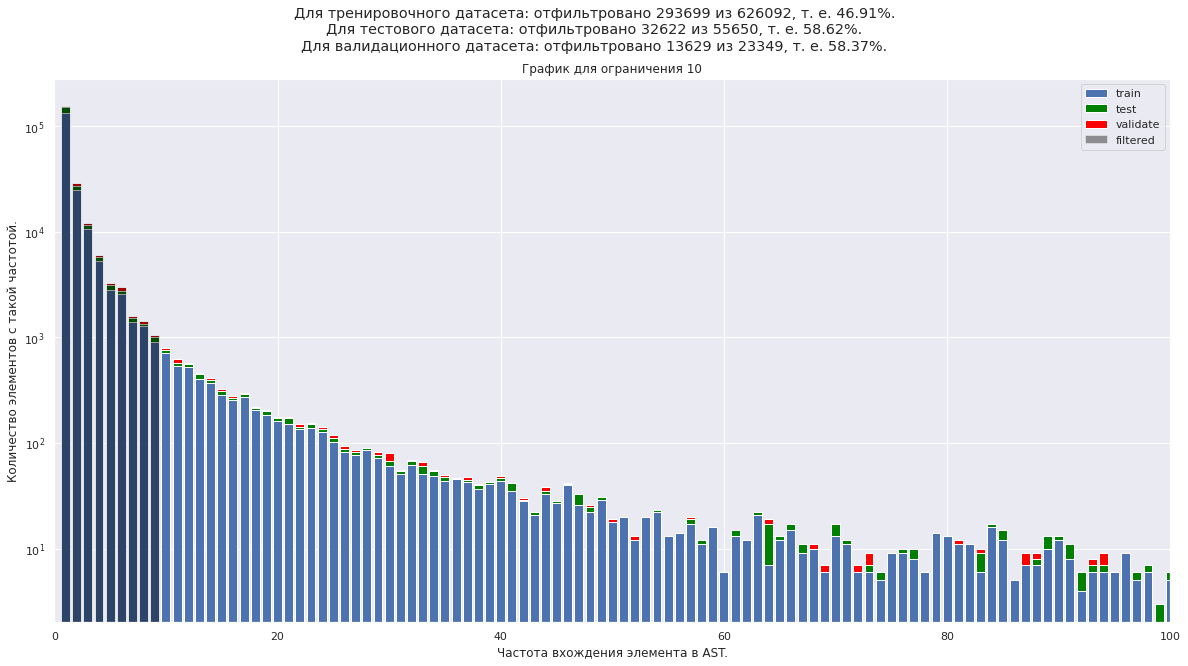

In [5]:
# !./preprocess_existing_dataset.sh 0
dict_info("dataset/java-small/java-small.c2v.dict")

# Гистограмма топ N имён функций по встречаемости из всех наборов.

In [6]:
TRAIN_VOCAB_PATH = "dataset/java-small/java-small.train.functions.vocab"
TEST_VOCAB_PATH = "dataset/java-small/java-small.test.functions.vocab"
VALIDATION_VOCAB_PATH = "dataset/java-small/java-small.validation.functions.vocab"

Загрузим все vocab-ы в pandas-таблицы:

In [7]:
import pandas as pd

train_df = pd.read_csv(TRAIN_VOCAB_PATH, sep=' ', names=["Function", "Frequency"])
test_df = pd.read_csv(TEST_VOCAB_PATH, sep=' ', names=["Function", "Frequency"])
validation_df = pd.read_csv(VALIDATION_VOCAB_PATH, sep=' ', names=["Function", "Frequency"])

train_df["Dataset"] = ["train"] * len(train_df)
test_df["Dataset"] = ["test"] * len(test_df)
validation_df["Dataset"] = ["validation"] * len(validation_df)

display(train_df.sort_values(by="Function"))
display(test_df.sort_values(by="Function"))
display(validation_df.sort_values(by="Function"))

,Function,Frequency,Dataset
108,$,1,train
179268,$$|hibernate|get|entity|entry,2,train
172116,$$|hibernate|get|entity|instance,2,train
51594,$$|hibernate|get|next|managed|entity,2,train
14020,$$|hibernate|get|previous|managed|entity,2,train
...,...,...,...
100732,zz|unpack|action,38,train
145468,zz|unpack|attribute,38,train
175293,zz|unpack|c|map,19,train
118066,zz|unpack|row|map,38,train


,Function,Frequency,Dataset
103,$,5,test
284,_,67,test
287,a,162,test
13943,abandon|block,4,test
10294,abbr,127,test
...,...,...,...
15727,x|attrs|to|json,1,test
15371,x|attr|names|to|json,1,test
11594,yield,1,test
18922,zip|dir,1,test


,Function,Frequency,Dataset
94,aabb|expand,1,validation
2039,aabb|overlap,1,validation
540,aabb|test,1,validation
5582,able|to|draw,1,validation
5987,abs,5,validation
...,...,...,...
105,y,1,validation
7083,y|slider|moved,4,validation
107,z,1,validation
2069,zero,1,validation


Сгруппируем по дубликатам и просуммируем:

In [8]:
conc = pd.concat([train_df, test_df, validation_df], ignore_index=True)
conc = conc.groupby('Function').sum().reset_index()

display(conc)

,Function,Frequency
0,$,6
1,$$|hibernate|get|entity|entry,2
2,$$|hibernate|get|entity|instance,2
3,$$|hibernate|get|next|managed|entity,2
4,$$|hibernate|get|previous|managed|entity,2
...,...,...
215516,zz|unpack|action,38
215517,zz|unpack|attribute,38
215518,zz|unpack|c|map,19
215519,zz|unpack|row|map,38


Построим гистограмму встречаемости слов для заданного датасета


In [9]:
def target_histogram(data, name, data_type, limit = 50):
    cnt = Counter()
    freqs = data["Frequency"]
    targets = data["Function"]
    for seq, freq in zip(targets, freqs):
        cnt.update({seq: freq})

    srt = sorted(cnt.items(), key=lambda x: x[1], reverse=True)
    srt_labels, srt_freqs = list(map(list, zip(*srt)))
    srt_labels = srt_labels[:limit] + ['other words']
    srt_freqs = srt_freqs[:limit] + [sum(srt_freqs[limit:])]
    plt.figure(figsize=(15, 8))
    plt.title(f"Распределение первых {limit} {data_type} по встречаемости в " + name + " датасете")
    plt.yscale("log")
    plt.xticks(rotation='vertical')
    plt.margins(0.025)
    plt.bar(srt_labels, srt_freqs)
    plt.plot();

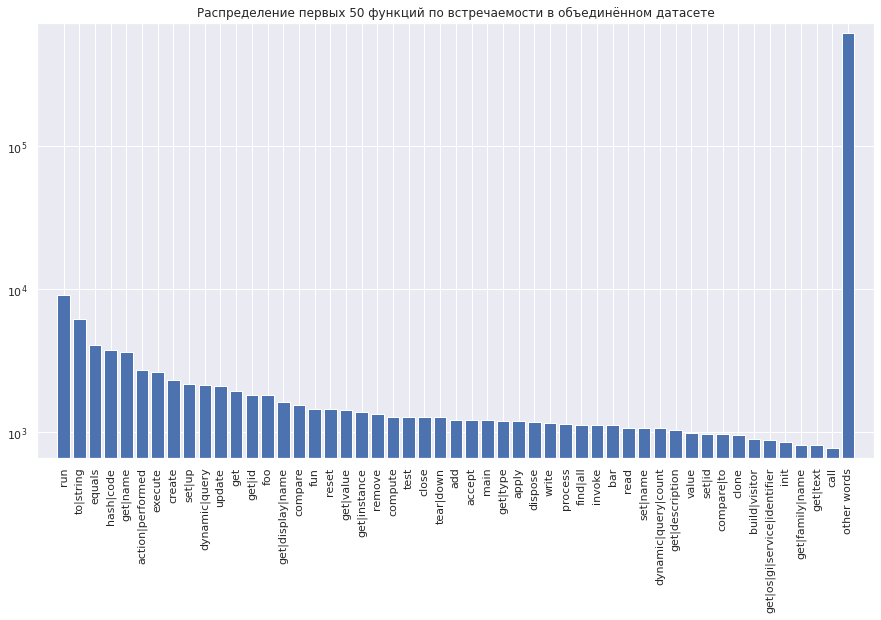

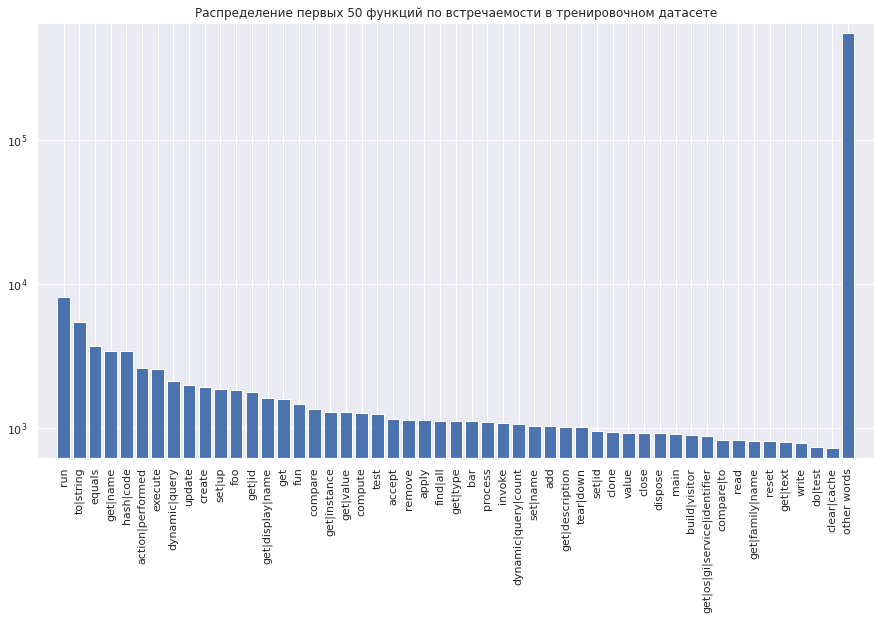

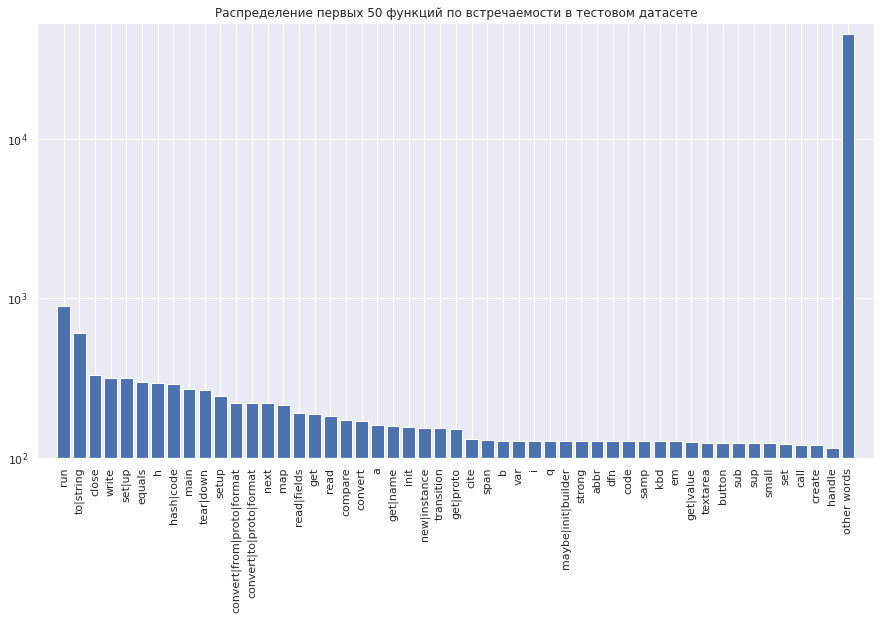

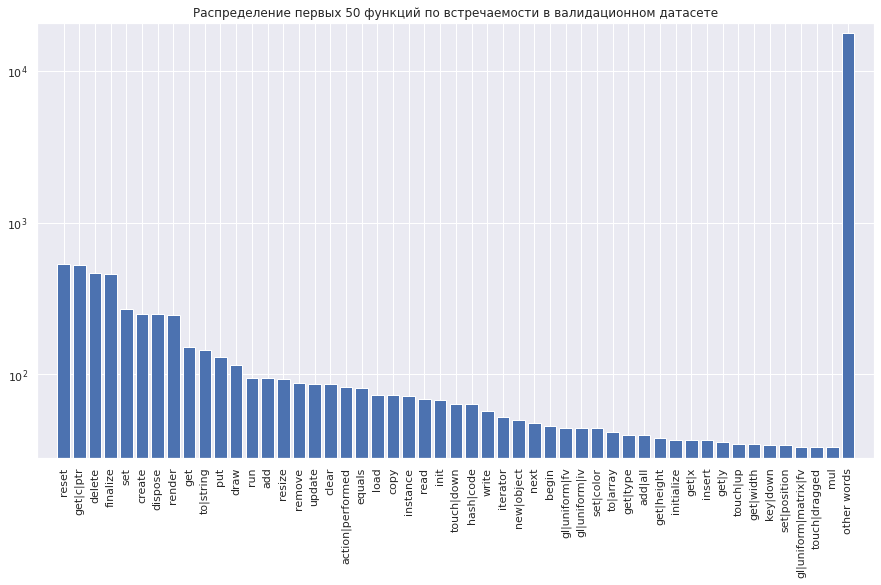

In [10]:
target_histogram(conc, "объединённом", "функций")
target_histogram(train_df, "тренировочном", "функций")
target_histogram(test_df, "тестовом", "функций")
target_histogram(validation_df, "валидационном", "функций")

# Часть 2. code2var

Train total: 108198 total lines
Validate total: 18849 total lines
Test total: 5640 total lines


 10


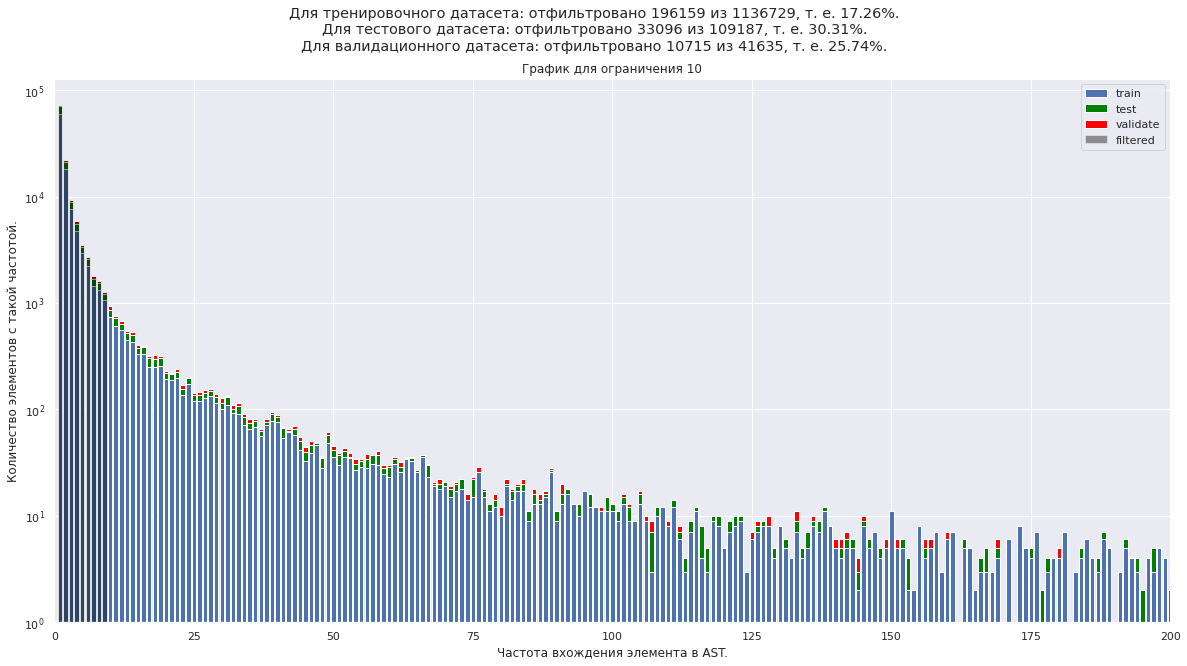

In [11]:
# !./preprocess_existing_dataset.sh 0
dict_info("dataset/java-small/java-small.var.c2v.dict", 200)

# Гистограмма топ N имён функций по встречаемости из всех наборов.

In [12]:
TRAIN_VOCAB_PATH = "dataset/java-small/java-small.train.variables.vocab"
TEST_VOCAB_PATH = "dataset/java-small/java-small.test.variables.vocab"
VALIDATION_VOCAB_PATH = "dataset/java-small/java-small.validation.variables.vocab"

Загрузим все vocab-ы в pandas-таблицы:

In [13]:
import pandas as pd

train_df = pd.read_csv(TRAIN_VOCAB_PATH, sep=' ', names=["Variable", "Frequency"])
test_df = pd.read_csv(TEST_VOCAB_PATH, sep=' ', names=["Variable", "Frequency"])
validation_df = pd.read_csv(VALIDATION_VOCAB_PATH, sep=' ', names=["Variable", "Frequency"])

train_df["Dataset"] = ["train"] * len(train_df)
test_df["Dataset"] = ["test"] * len(test_df)
validation_df["Dataset"] = ["validation"] * len(validation_df)

train_df["Variable"].astype(str)
test_df["Variable"].astype(str)
validation_df["Variable"].astype(str)

display(train_df.sort_values(by="Variable"))
display(test_df.sort_values(by="Variable"))
display(validation_df.sort_values(by="Variable"))
display(train_df.dtypes)

,Variable,Frequency,Dataset
74,$,1,train
47094,$missing$,63,train
104284,$this,2,train
115,A,6,train
99652,ABC,1,train
...,...,...,...
55162,zzNext,19,train
100347,zzRowMapL,19,train
446,zzTransL,19,train
79908,zzz,2,train


,Variable,Frequency,Dataset
169,A,4,test
10649,A1,3,test
17391,A1A,1,test
17395,A1B,1,test
10651,A2,3,test
...,...,...,...
1452,zs,2,test
1455,zt,2,test
9272,zvec,3,test
1477,zz,4,test


,Variable,Frequency,Dataset
48,A,14,validation
50,B,15,validation
196,Bparent,1,validation
51,C,9,validation
3316,C1,1,validation
...,...,...,...
510,zw,1,validation
514,zx,2,validation
516,zy,2,validation
517,zz,5,validation


Variable     object
Frequency     int64
Dataset      object
dtype: object

Сгруппируем по дубликатам и просуммируем:

In [14]:
conc = pd.concat([train_df, test_df, validation_df], ignore_index=True)
conc = conc.groupby('Variable').sum().reset_index()

display(conc)

,Variable,Frequency
0,$,1
1,$missing$,63
2,$this,2
3,A,24
4,A1,3
...,...,...
126260,zzMarkedPosL,19
126261,zzNext,19
126262,zzRowMapL,19
126263,zzTransL,19


Построим гистограмму встречаемости слов для заданного датасета


In [15]:
def target_histogram_var(data, name, limit = 50):
    cnt = Counter()
    freqs = data["Frequency"]
    targets = data["Variable"]
    for seq, freq in zip(targets, freqs):
        cnt.update({seq: freq})

    srt = sorted(cnt.items(), key=lambda x: x[1], reverse=True)
    srt_labels, srt_freqs = list(map(list, zip(*srt)))
    srt_labels = np.array(srt_labels[:limit] + ['other words'], dtype=np.str)
    srt_freqs = srt_freqs[:limit] + [sum(srt_freqs[limit:])]
    plt.figure(figsize=(15, 8))
    plt.title(f"Распределение первых {limit} переменных по встречаемости в " + name + " датасете")
    plt.yscale("log")
    plt.xticks(rotation='vertical')
    plt.margins(0.025)
    plt.bar(srt_labels, srt_freqs)
    plt.plot();

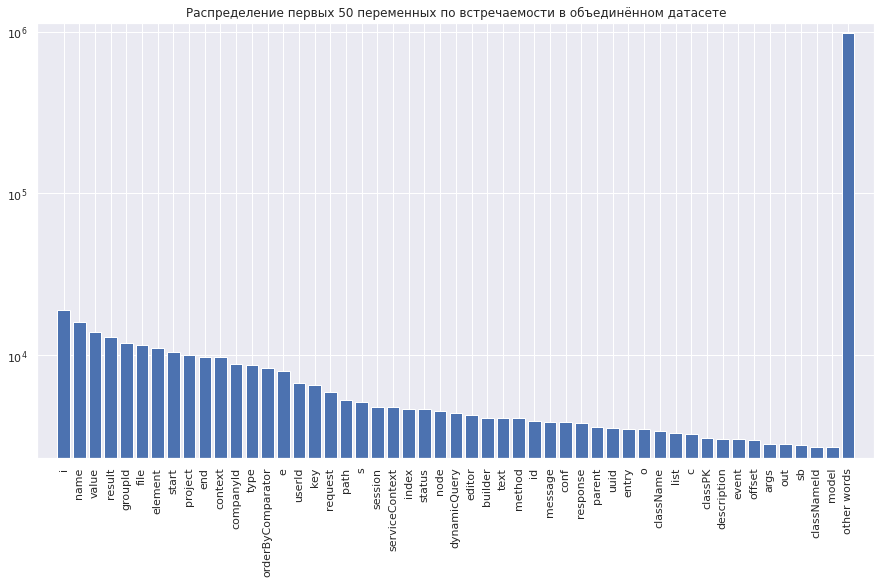

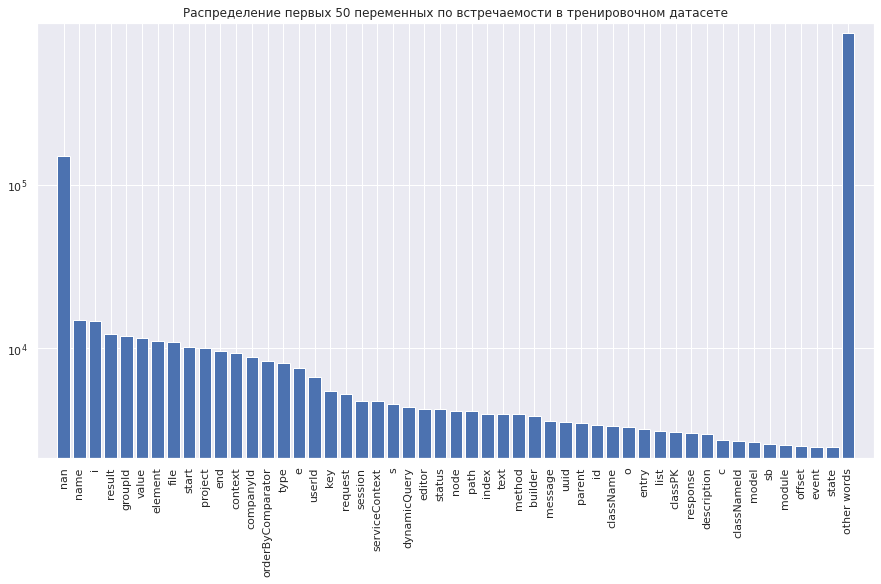

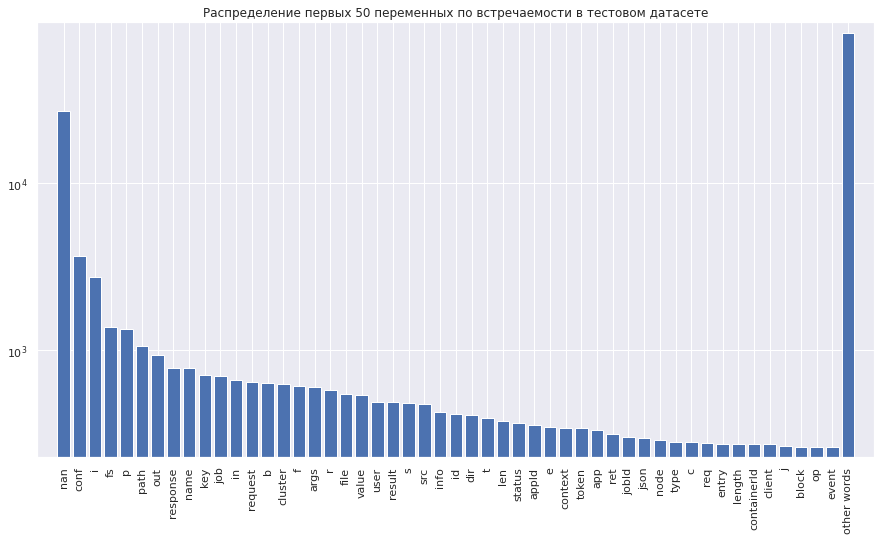

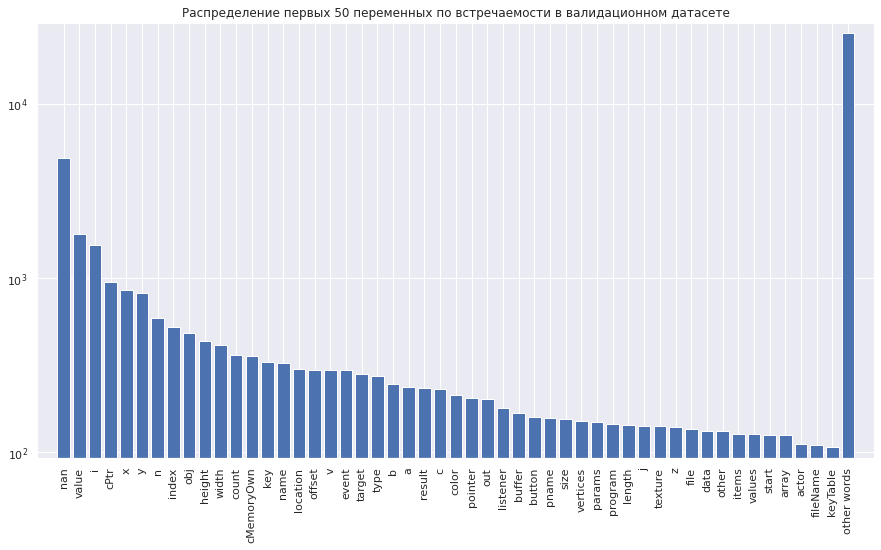

In [16]:
target_histogram_var(conc, "объединённом")
target_histogram_var(train_df, "тренировочном")
target_histogram_var(test_df, "тестовом")
target_histogram_var(validation_df, "валидационном")